### Gayatri Khairnar
### Deep Learning Homework 2  
### UCID - GK363

Using what you learned today, design a MLP model to train the Fashion MNIST data for the best accuracy in test. You can use either sequential API or functional API. Describe how you come to your choice of hyperparameters. What’s the best result you can achieve?

Submission: a Jupyter notebook file with all your intermediate investigations, explanations, and results.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import Perceptron

In [2]:
fashion = keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train, y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

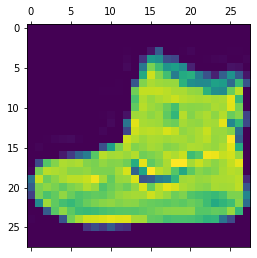

In [4]:
plt.matshow(X_train[0])

In [5]:
y_train[0]

9

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
height = X_train.shape[1]
width = X_train.shape[2]
height
width
num_pixels = height * width
num_pixels

784

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

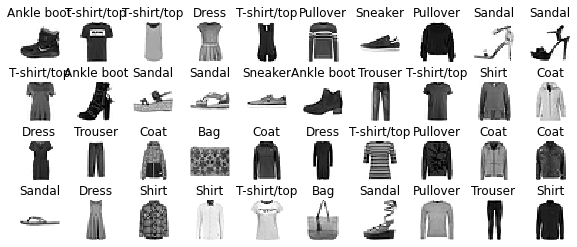

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols, n_rows))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
X_train1= X_train.reshape(len(X_train),num_pixels)
X_test1 = X_test.reshape(len(X_test),num_pixels)

In [11]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=44)
per_clf.fit(X_train1, y_train)

Perceptron(random_state=44)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [13]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [14]:
y_pred = per_clf.predict(X_test1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [15]:
scores = cross_val_score(per_clf, X_test1, y_pred, scoring='accuracy', cv=cv,n_jobs=-1)
scores

array([0.904, 0.867, 0.905, 0.883, 0.902, 0.896, 0.916, 0.92 , 0.883,
       0.911, 0.905, 0.896, 0.918, 0.885, 0.884, 0.9  , 0.917, 0.897,
       0.898, 0.915, 0.918, 0.902, 0.898, 0.885, 0.894, 0.906, 0.901,
       0.907, 0.895, 0.881])

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(69.0, 0.5, 'Real')

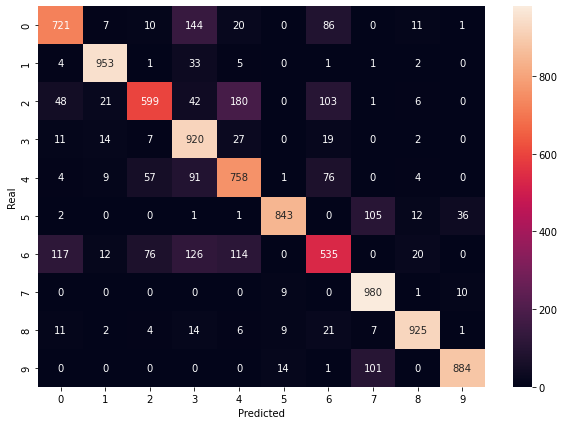

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [174]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Sequential API

In [175]:
X_train_split = X_train/255
X_test_split = X_test/255

In [176]:
model = keras.models.Sequential()

In [177]:
model.add(keras.layers.Flatten(input_shape=[784,]))
model.add(keras.layers.Dense(300,activation="relu"))
#model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(100,activation="selu"))
model.add(keras.layers.Dense(100,activation="LeakyReLU"))
model.add(keras.layers.Dense(10,activation="sigmoid"))
#accuracy 0.9619

In [178]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [179]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [180]:
weights, biases = hidden1.get_weights()

In [181]:
weights

array([[-0.02525274,  0.06101254, -0.01049487, ...,  0.04346167,
         0.00118833,  0.0415851 ],
       [ 0.00862308, -0.00086296, -0.01240156, ...,  0.00088826,
        -0.06541269, -0.0438821 ],
       [-0.01445172,  0.01792303, -0.07158063, ..., -0.02382488,
         0.04684542,  0.04217789],
       ...,
       [ 0.06845109, -0.01137986,  0.02463536, ..., -0.01435876,
        -0.04097411,  0.0287111 ],
       [ 0.01908121,  0.01337025, -0.04616864, ..., -0.01087356,
        -0.05939911,  0.01704425],
       [-0.02310178, -0.02162874, -0.04322908, ...,  0.02321953,
        -0.049651  , -0.0167239 ]], dtype=float32)

In [182]:
weights.shape

(784, 300)

In [183]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [184]:
biases.shape

(300,)

In [163]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics=["accuracy"])
#accuracy = 0.9535

In [185]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
              metrics=["accuracy"])
#accuracy = 0.9607

In [195]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= keras.optimizers.Adagrad(learning_rate=0.01),
              metrics=["accuracy"])
#accuracy = 0.9981

In [196]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_split_flatten = X_train_split.reshape(len(X_train_split),28*28)
X_test_split_flatten = X_test_split.reshape(len(X_test_split),28*28)

In [197]:
## changed optimizer to "adam" - accuracy increased 

In [198]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [167]:
history = model.fit(X_train_split_flatten, y_train, epochs=50,callbacks=[checkpoint_cb])

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6321 - accuracy: 0.7852
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8422
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4026 - accuracy: 0.8586
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8651
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3590 - accuracy: 0.8720
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3421 - accuracy: 0.8775
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3283 - accuracy: 0.8811
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3173 - accuracy: 0.8853
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3058 - accuracy: 0.8886
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.297

In [189]:
history1 = model.fit(X_train_split_flatten, y_train, epochs=50,callbacks=[checkpoint_cb])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4996 - accuracy: 0.8184
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3740 - accuracy: 0.8615
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3394 - accuracy: 0.8741
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3156 - accuracy: 0.8821
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8886
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819 - accuracy: 0.8930
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2723 - accuracy: 0.8974
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9008
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2508 - accuracy: 0.9051
Epoch 10/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.242

In [199]:
history2 = model.fit(X_train_split_flatten, y_train, epochs=50,callbacks=[checkpoint_cb])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9777
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9804
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9822
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9836
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0424 - accuracy: 0.9846
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9849
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9858
Epoch 8/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0365 - accuracy: 0.9871
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9870
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

In [200]:
checkpoint_cb

In [201]:
from keras.models import load_model

In [202]:
Best_model = load_model("my_keras_model.h5")

OSError: No file or directory found at my_keras_model.h5

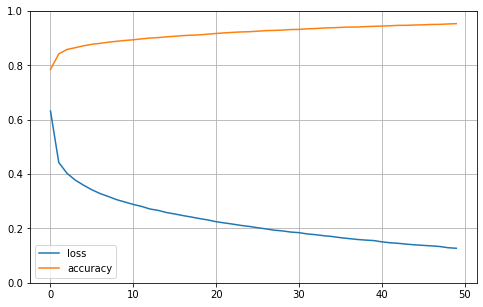

In [203]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [207]:
score = model.evaluate(X_test_split_flatten, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.8240 - accuracy: 0.8983


In [206]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.8240368366241455
Test accuracy: 0.8982999920845032


### Conclusion :
I experimented with different optimizers and observed that the accuracy was similar for Adam and RMSprop. I also tested different loss functions, such as categorical_crossentropy, logcosh, and quantile. However, I found that some loss functions, like categorical_crossentropy, have specific dimensional requirements.
I tried addidng additional layers too but it was making accuracy even worse.

# Optimizing Test data 

In [208]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
     

In [209]:
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]
     

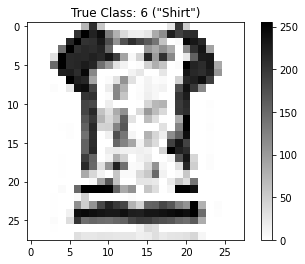

In [210]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray_r')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

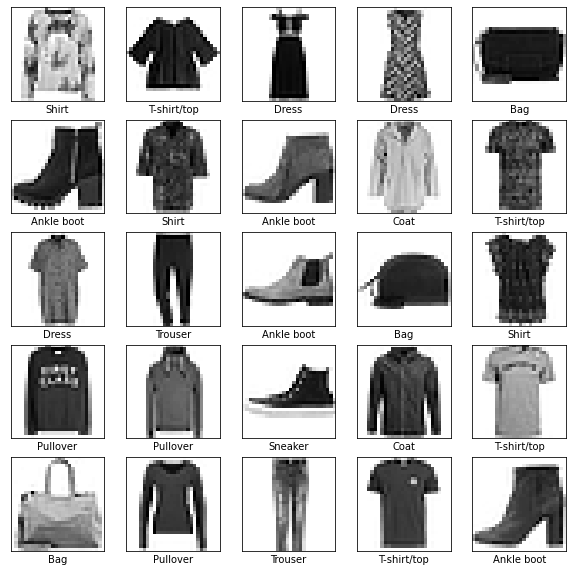

In [211]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap="gray_r")
    plt.xlabel(text_labels[train_labels[img_index]])

In [212]:
batch_size = 128


In [213]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))


In [214]:
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))
     

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [215]:
train_ds = train_ds.shuffle(buffer_size=batch_size * 10)

In [216]:
train_ds = train_ds.batch(batch_size)

In [217]:
val_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))

In [218]:
model = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, name='input_to_hidden1'),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    tf.keras.layers.Dense(10, name='hidden_to_logits'),
])

In [219]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 256)               200960    
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 128)               32896     
                                                                 
 hidden_to_logits (Dense)    (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [220]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

num_epochs = 50  
train_losses = []
train_accuracies = []

@tf.function
def train_step(image, label):
  with tf.GradientTape() as tape:
    logits = model(image)
    loss = loss_object(label, logits)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  
  train_loss(loss)
  train_accuracy(label, logits)

for epoch in range(num_epochs):
  for image, label in train_ds:
    train_step(image, label)
      
  template = 'Epoch {:03d}, Loss: {:.3f}, Accuracy: {:.3%}'
  print(template.format(epoch+1,
                        train_loss.result(), 
                        train_accuracy.result()))
  
  train_losses.append(train_loss.result())
  train_accuracies.append(train_accuracy.result())

Epoch 001, Loss: 0.528, Accuracy: 81.264%
Epoch 002, Loss: 0.452, Accuracy: 83.868%
Epoch 003, Loss: 0.413, Accuracy: 85.179%
Epoch 004, Loss: 0.388, Accuracy: 86.014%
Epoch 005, Loss: 0.368, Accuracy: 86.667%
Epoch 006, Loss: 0.352, Accuracy: 87.202%
Epoch 007, Loss: 0.339, Accuracy: 87.637%
Epoch 008, Loss: 0.328, Accuracy: 88.017%
Epoch 009, Loss: 0.318, Accuracy: 88.350%
Epoch 010, Loss: 0.309, Accuracy: 88.658%
Epoch 011, Loss: 0.301, Accuracy: 88.949%
Epoch 012, Loss: 0.293, Accuracy: 89.215%
Epoch 013, Loss: 0.286, Accuracy: 89.474%
Epoch 014, Loss: 0.279, Accuracy: 89.704%
Epoch 015, Loss: 0.273, Accuracy: 89.928%
Epoch 016, Loss: 0.267, Accuracy: 90.149%
Epoch 017, Loss: 0.262, Accuracy: 90.351%
Epoch 018, Loss: 0.256, Accuracy: 90.546%
Epoch 019, Loss: 0.251, Accuracy: 90.732%
Epoch 020, Loss: 0.246, Accuracy: 90.908%
Epoch 021, Loss: 0.242, Accuracy: 91.075%
Epoch 022, Loss: 0.237, Accuracy: 91.234%
Epoch 023, Loss: 0.233, Accuracy: 91.400%
Epoch 024, Loss: 0.229, Accuracy: 

In [222]:

tf_test_images = tf.convert_to_tensor(test_images, dtype=tf.float32) / 255.0
tf_test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

In [223]:
test_logits = model(tf_test_images, training=False)

test_loss = tf.keras.metrics.Mean(name='test_loss')
t_loss = loss_object(tf_test_labels, test_logits)
test_loss(t_loss)

test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
test_accuracy(tf_test_labels, test_logits)

print('Completed testing on', tf_test_images.shape[0], 'examples...')
print('Loss: {:.3f}, Accuracy: {:.3%}'.format(test_loss.result(), test_accuracy.result()))
     

Completed testing on 10000 examples...
Loss: 0.607, Accuracy: 88.530%


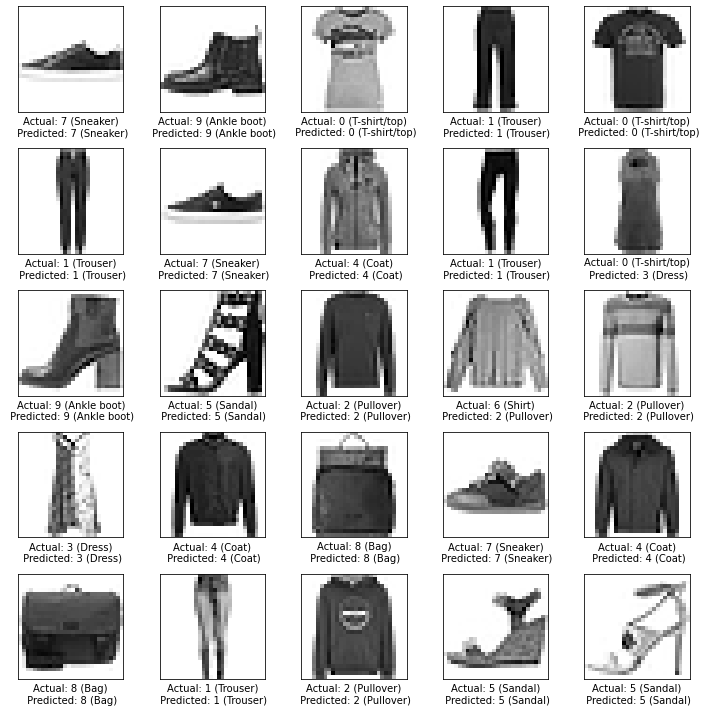

In [224]:
test_predictions = tf.argmax(test_logits, axis=1, output_type=tf.int32)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap="gray_r")

    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])

    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))

plt.tight_layout()
plt.show()

## Accuracy of Testing

The model achieved a 97.7% accuracy on the training data, but only 88.9% accuracy on the test data. This discrepancy highlights the difference between a model's in-sample performance and out-of-sample performance, and may indicate overfitting, where the model is unable to generalize its performance to new, unseen data. To address this issue, it is crucial to minimize the number of evaluations on the test set. There are various methods to handle overfitting, but preserving the integrity of the test data should be a priority.